In [1]:
'''MNIST image recognition using Regression '''

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot =True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
sample_image = mnist.train.images[0].reshape(28,28)

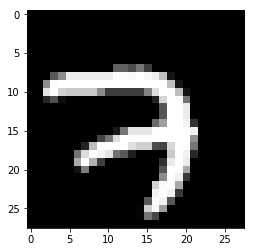

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
plt.imshow(sample_image)

In [4]:
#defining the hyperparameters and common parameters

#Parametrs
learning_rate = 0.01
num_steps = 100
batch_size = 128
display_step = 1

#Network Prameters
n_hidden_1 = 300  #no. of neurons in layer 1
n_hidden_2 = 300  # no. of neurons in layer 2
num_input = 784   # = 28x28
num_classes = 10  # = 0-9 

#Training Parameters
checkpoint_every = 100
checkpoint_dir = './runs/'

In [5]:
import tensorflow as tf
from __future__ import print_function

In [9]:
class Model():
    
    #Assingning names to placeholders for later use
    X = tf.placeholder("float", [None, num_input], name = "input_x")
    Y = tf.placeholder("float", [None, num_classes], name = "input_y")
    
    #Defining weights and biases and initializing them randomly
    weights = {'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
              'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
              'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))}
    
    biases = {'b1' : tf.random_normal([n_hidden_1]),
             'b2': tf.random_normal([n_hidden_2]),
             'out': tf.random_normal([num_classes])}
    
    #Defining the logistic regression operation which is basically weights X input + bias
    #Or defining layers, in other words
    layer_1 = tf.add(tf.matmul(X,weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2'])
    logits = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    
    #converting the logits values into probabilities using Softmax
    prediction = tf.nn.softmax(logits, name ='prediction')
    
    #Defining cost and Optimization
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    train_op = optimizer.minimize(loss)
    
    #In the end making prediction 
    correct_pred = tf.equal(tf.argmax(prediction,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    #return correct_pred, accuracy

In [10]:
#correct_pred, accuracy = Model()

In [11]:
import os 

Modl = Model()
X = Modl.X
Y = Modl.Y

checkpoint_dir = os.path.abspath(os.path.join(checkpoint_dir,"checkpoints"))
checkpoint_prefix = os.path.join(checkpoint_dir,"model")
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
    
#Keeping the last 2 checkpoints to manage storage
saver = tf.train.Saver(tf.global_variables(), max_to_keep = 2)

In [12]:
#Begin training

#Initialize the variables
init = tf.global_variables_initializer()
all_loss = []

#training starts
with tf.Session() as sess:
    writer_1 = tf.summary.FileWriter("./runs/summary/",sess.graph)
    
    sum_var = tf.summary.scalar("loss", Modl.accuracy)
    write_op = tf.summary.merge_all()
    
    #Run the initializer
    sess.run(init)
    
    for step in range(1, num_steps+1):
        #Extracting
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        #optimization
        sess.run(Modl.train_op, feed_dict = {X: batch_x, Y: batch_y})
        if step %display_step == 0:
            #batch loss and accuracy
            loss, acc = sess.run([Modl.loss, Modl.accuracy], feed_dict = {X: batch_x, Y: batch_y})
            all_loss.append(loss)
            print("Step " + str(step) + ", Minibatch Loss= " + "{:.4f}".format(loss) + ", Training Accuracy= " + "{:.3f}".format(acc))
            #writer_1.add_summary(summary, step)
            print("Saved Model checkpoint to {}\n".format(checkpoint_dir))
            
        if step % checkpoint_every == 0:
            path = saver.save(sess, checkpoint_prefix, global_step=step)
            
    print("Optimization finished!\n")
    print("Testing Accuracy:", sess.run(Modl.accuracy, feed_dict={X: mnist.test.images,Y: mnist.test.labels}))

Step 1, Minibatch Loss= 2601.7729, Training Accuracy= 0.125
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 2, Minibatch Loss= 2368.5613, Training Accuracy= 0.266
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 3, Minibatch Loss= 2132.1995, Training Accuracy= 0.305
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 4, Minibatch Loss= 1012.8754, Training Accuracy= 0.445
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 5, Minibatch Loss= 843.4351, Training Accuracy= 0.625
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 6, Minibatch Loss= 798.9785, Training Accuracy= 0.656
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 7, Minibatch Loss= 996.4614, Training Accuracy= 0.594
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkp

Step 80, Minibatch Loss= 220.8069, Training Accuracy= 0.898
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 81, Minibatch Loss= 254.6327, Training Accuracy= 0.820
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 82, Minibatch Loss= 323.0535, Training Accuracy= 0.805
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 83, Minibatch Loss= 242.9576, Training Accuracy= 0.875
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 84, Minibatch Loss= 488.8366, Training Accuracy= 0.812
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 85, Minibatch Loss= 181.4976, Training Accuracy= 0.891
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\checkpoints\checkpoints

Step 86, Minibatch Loss= 372.0328, Training Accuracy= 0.844
Saved Model checkpoint to C:\Users\akash.sharma\Desktop\runs\che

In [ ]:
#Inference

#Pointing the model checkpoint
checkpoint_file = tf.train.latest_checkpoint(os.path.join(checkpoint_dir,'checkpoint'))
print(checkpoint_file)
print(os.path.join(checkpoint_dir,'checkpoint'))
print("{}.meta".format(os.path.join(checkpoint_dir,'checkpoint')))

saver = tf.train.import_meta_graph("{}.meta".format(checkpoint_file))

#Load the input variable from the model
input_x = tf.get_default_graph().get_operation_by_name("input_x").outputs[0]

#Load prediction Operation
prediction = tf.get_default_graph().get_operation_by_name("prediction").outputs[0]

#Load test data
test_data = np.array([mnist.test.images[0]])

with tf.Session() as sess:
    #Restore the model from the checkpoint
    saver.restore(sess, checkpoint_file)
    #Execute the model to make predictions
    data = sess.run(prediction, feed_dict ={input_x: test_data})
    print("Predicted digit: ", data.argmax())